In [12]:
import numpy as np
import networkx as nx
import random
import time
import matplotlib.pyplot as plt

In [76]:
G = nx.read_weighted_edgelist('random_1000.edgelist', nodetype = int)

In [73]:
def time_dijkstra(G,s):
    start = time.time()
    D = [float('inf')] * nx.number_of_nodes(G)
    X = set(G.nodes)
    D[s] = 0
    while X:
        def my_extract_min(D,X):
            arg_min = -1
            min_value = float('inf')
            for i in range(len(D)):
                if D[i] < min_value:
                    if i in X:
                        arg_min = i
                        min_value = D[i]
            return arg_min
        u = my_extract_min(D,X)
        X.remove(u)
        for v in G.neighbors(u):
            if v in X:
                re = D[u] + G.edges[u,v]['weight']
                if D[v] > re:
                    D[v] = re
    elapsed_time = time.time() - start
    return elapsed_time

In [74]:
time_dijkstra(G,0)

24.181009531021118

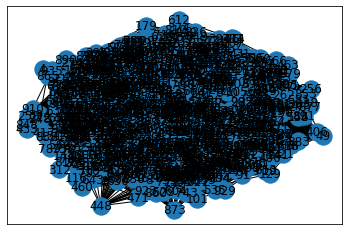

In [77]:
nx.draw_networkx(G)
plt.show()

In [44]:
for i in range(1000,10001,1000):
    G = nx.fast_gnp_random_graph(i,0.05)
    
    for (u,v) in G.edges():
        G.edges[u,v]['weight'] = random.randint(1,100)
    
    nx.write_weighted_edgelist(G, "random_" + str(i) + ".edgelist")